# Facebook Comment Analytics (Commenter)
----
In this notebook, we will explore user that has comment many comment and see their behavior.

In [117]:
import pandas as pd
import numpy as np
from pythainlp.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
mpl.rc('font',family='JasmineUPC')
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15) 
%matplotlib inline

In [2]:
import plotly 
plotly.tools.set_credentials_file(username='TeerapatChaiwachirasak', api_key='RMqZv6z9pSmGeRafgNnS')
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
#Test reading from .tsv
commentDf = pd.read_csv('../dataset/facebook_comment.tsv',sep ='\t')
commentDf['message'] = np.nan_to_num(commentDf['message'])
commentDf = commentDf[['commenter_name','created_time','like_count','message','service']]
commentDf['created_date'] = pd.to_datetime(commentDf['created_time'], format='%Y-%m-%d %H:%M:%S.%f')
commentDf['created_date_format'] = commentDf['created_date'].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))
commentDf['service'][commentDf['service']==True] = 'TRUE'
commentDf.head()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,commenter_name,created_time,like_count,message,service,created_date,created_date_format
0,Nui Worabut,2016-06-01 12:53:00,1.0,ใช้โปรเสริม net non..9 gb ใช้หมดลดความเร็วไม่...,DTAC,2016-06-01 12:53:00,2016-06-01
1,Chandratithaya Je-u,2016-06-02 17:17:32,0.0,ใช้ดีแทค แล้วปวดใจจริงๆ สัญญานขาดหาย อินเตอร์เ...,DTAC,2016-06-02 17:17:32,2016-06-02
2,Hataichanok Maklamai,2016-06-02 07:51:45,0.0,ส่งขอมูลไปทาง ib แล้วนะคะ รบกวนตอบด้วยคะ ส่งไป...,DTAC,2016-06-02 07:51:45,2016-06-02
3,Nattapong Wongsa,2016-06-02 15:43:53,1.0,อะไรนี้...ไม่เปิดให้เติมเกมส์ใช้ปะ จะได้เลิกใช้,DTAC,2016-06-02 15:43:53,2016-06-02
4,Jitsak Sisawad,2016-06-02 15:09:06,0.0,ห่วยแตกไม่เคยแจ้งข่าวสารให้ลูก อยู่ๆก้มาเก็บค่...,DTAC,2016-06-02 15:09:06,2016-06-02


## Here we are going to look at top commenters (commenter whose comment a lot)
---------------------------

In [4]:
commentDf['commenter_name'].value_counts().head(10)

ธนิด ภัทรกิตติ      1830
อนันต์ ด้า           548
TrueMove H           399
AIS                  237
Joe KonTummada       182
Kittithat Tri        177
Artinut Nopparat     156
Bosa Bisabo          142
เชยกลิ่น แล้วงัย     140
Back Green           139
Name: commenter_name, dtype: int64

## Let's also find top 3 commenter for each of the service provider
--------

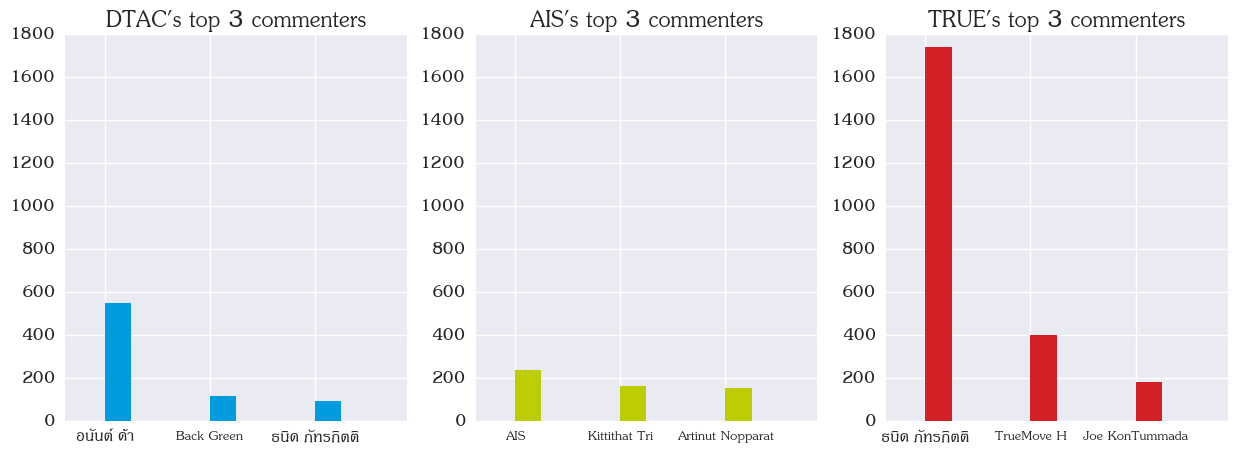

In [5]:
def topCommenter():
    colors = ['#019CDE','#BCCD05','#D51F26']
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    for i,service in enumerate(['DTAC','AIS','TRUE']):
        topCommenter = commentDf['commenter_name'][commentDf['service']==service].value_counts().head(3)
        ax[i].bar([0.75,2.75,4.75],topCommenter,width=0.5,color=colors[i],edgecolor = "none")
        ax[i].set_xlim((0,6.5))
        ax[i].set_ylim((0,1800))
        ax[i].set_title(service+"'s top 3 commenters",fontsize=25)
        ax[i].set_xticks([0.75,2.75,4.75])
        ax[i].set_xticklabels(topCommenter.index.values)    
    plt.show()
topCommenter()

### Let's focus on คุณ ธนิด ภัทรกิตติ first.
-----------

ธนิด ภัทรกิตติ has 1830 comments.
Sample comment : 
154


,message,created_date_format,service
127493,ทรูยูครับเมื่อวันศุกร์ผมแจ้งคุณนิพนธ์ไปแล้วว่า...,2016-07-09,TRUE
139341,คุณนิพนธ์ คุณสุรชาติ คณอรอุมา และเจ้าหน้าที่ 1...,2016-11-02,TRUE
138811,เรียนคุณจารุณี จรรยาธรรม\nช่วยตรวจสอบการทำงานข...,2016-11-08,TRUE
139816,เรียนคุณจารุณี จรรยาธรรม\nช่วยตรวจสอบการทำงานข...,2016-11-08,TRUE
141067,เรียน คุณธนิด ภัทรกิตติ \n\n เรียล...,2016-11-22,TRUE
145137,เรียนคณะกรรมการ กสทช.\nแจ้งตรวจสอบ ROM ไม่ตรงส...,2016-12-16,TRUE
154379,เรียน คุณธนิด\n\nสำนักขอเรียนให้ท่านทราบว่า ได...,2017-02-17,TRUE


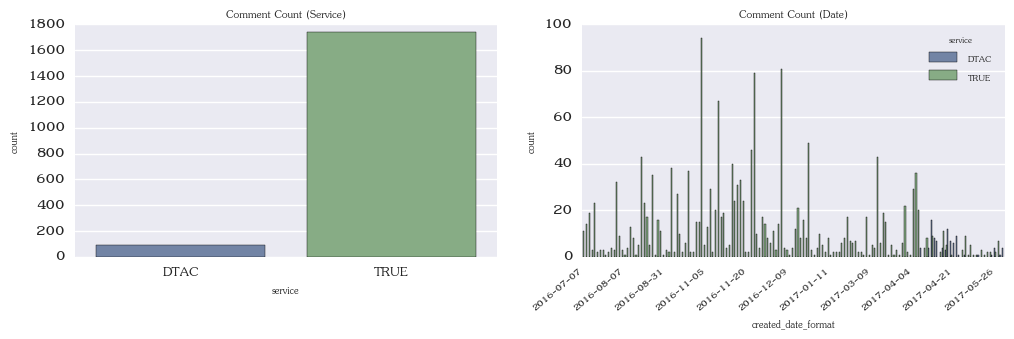

In [109]:
def commentFromUser(name):
    return commentDf[commentDf['commenter_name']==name]
from datetime import datetime
def analyzeUserComment(name):
    colors = sns.color_palette("muted", n_colors=8, desat=.5)
    comment = commentFromUser(name)
    print("%s has %d comments."%(name,comment.shape[0]))
    print("Sample comment : ")
    fig, axs = plt.subplots(ncols=2,figsize=(12,3))
    sns.countplot(x="service", data=comment,palette=colors,ax=axs[0])
    axs[0].set_title('Comment Count (Service)')
    sns.countplot(x="created_date_format", data=comment,hue='service',palette=colors,ax=axs[1])
    #axs[1].set_xticks([])
    #axs[1].set_xticklabels([])d = ts
    dateStr = [str(i)[10:20] for i in list(axs[1].get_xticklabels())]
    print(len(dateStr))
    if(len(dateStr)>=10):
        dateStr = [date if (i%int(len(dateStr)/10))==0  else "" for i,date in enumerate(dateStr) ]
        
    axs[1].set_xticklabels(dateStr, rotation=40, ha="right",size=10)
    axs[1].set_title('Comment Count (Date)')
    return comment[['message','created_date_format','service']].sample(7).sort_values('created_date_format')
    
analyzeUserComment('ธนิด ภัทรกิตติ')

In [118]:
commentByDate = commentDf[commentDf['commenter_name']=='ธนิด ภัทรกิตติ']['created_date_format'].value_counts().sort_index()
x = commentByDate.index.values
y = commentByDate.values
data = [go.Scatter(
          x=x,
          y=y
        )]
py.iplot(data)

As you can see, most of the comment are negative towards TRUE (and little bit to DTac). We can assume that he is very active in using social media given the amount of comment he did.

### Moving on, let's see top commenter from DTac
--------

อนันต์ ด้า has 548 comments.
Sample comment : 
73


,message,created_date_format,service
18511,หลุดแม่งทั้งวัน,2016-10-17,DTAC
21616,เน็ตหลุดบ่อย จนเอือมระอา น่าเบื่อ,2016-11-06,DTAC
21720,สตรอง,2016-11-07,DTAC
24331,"โคตรกากเน็ตหมุนเป็น""ฮูลาฮูบ""เลยมึง",2016-11-24,DTAC
28856,เน็ตเหี้ยๆ,2016-12-11,DTAC
36946,เน็ตหมุนติ้วๆๆๆๆๆๆยังกับฮูลาฮูบ,2016-12-24,DTAC
45642,NaN,2017-02-08,DTAC


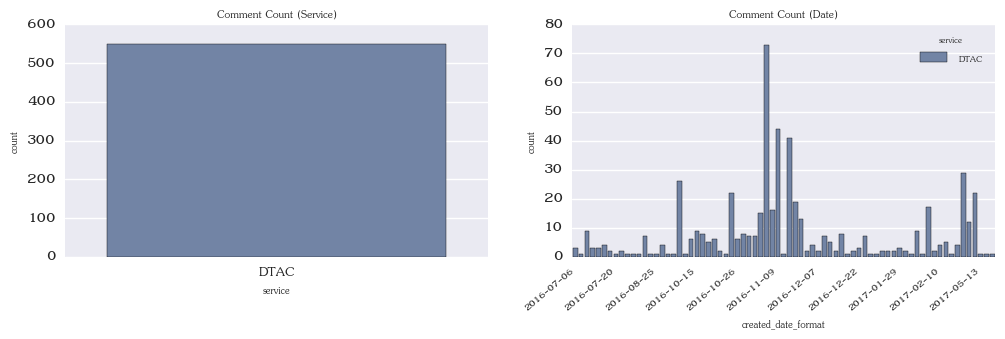

In [121]:
analyzeUserComment('อนันต์ ด้า')

Quite similar to previous commenter.

### Let's look at  คุณ Back Green.
--------------------

Back Green has 139 comments.
Sample comment : 
25


,message,created_date_format,service
134217,เน็ต สน ตีน,2016-08-30,TRUE
35599,ยิ่ง ด่า ยิ่ง และ สาด กุ ขำ กุ จะ เข้า มา ด่า ...,2016-12-19,DTAC
36861,เน็ตโคดกากสาดหมา,2017-01-06,DTAC
39761,กาก,2017-01-14,DTAC
45170,ไอสาดอารมเสียจิบผาย,2017-02-05,DTAC
44085,เน็ต512+โปร้สริมเฟสยังจะเข้าไม่ได้,2017-02-05,DTAC
42883,กล้าพูดไอสาดเน็ตสนตีน,2017-02-07,DTAC


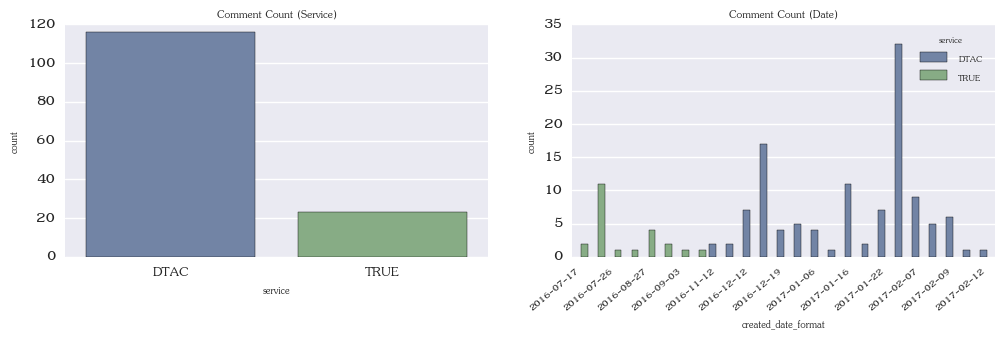

In [125]:
analyzeUserComment('Back Green')

## You can see how the comment shift from True to Dtac. 
-----------------------
This might mean that he/she moved from True to Dtac. From here, we might be able to find churn rate,date just from social media.

In [126]:
commentByDate = commentDf[commentDf['commenter_name']=='Back Green']['created_date_format'].value_counts().sort_index()
x = commentByDate.index.values
y = commentByDate.values

data = [go.Scatter(
          x=x,
          y=y
        )]
py.iplot(data)

TrueMove H has 399 comments.
Sample comment : 
131


,message,created_date_format,service
138585,สวัสดีค่ะ คุณRoyhan Wangchaiya แพ็กเกจเสริมการ...,2016-10-24,TRUE
138745,สวัสดีค่ะ คุณสมนึก คำพันธ์ ตรวจสอบหมายเลขดังกล...,2016-10-24,TRUE
139710,สวัสดีะ คุณ Goiizz Beside ทางเราแจ้งข้อมูลทาง ...,2016-10-31,TRUE
149484,"รบกวนคุณลูกค้าแจ้งข้อมูลหมายเลขที่ใช้งาน , รุ่...",2017-01-07,TRUE
160644,@Numnung Thantong สวัสดีค่ะ สำหรับแคมเปญ Prepa...,2017-03-22,TRUE
160565,สนใจติดต่อทรูช้อปพร้อมบัตรประชาชนนะคะ หรือหากม...,2017-03-26,TRUE
138393,สำหรับสัญญาณพื้นที่ที่แจ้งมาคือ หมู่บ้านแม่ลาก...,2017-05-02,TRUE


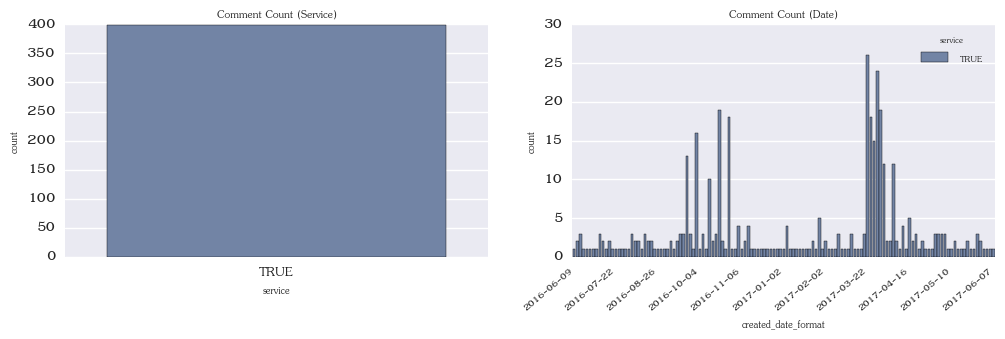

In [99]:
analyzeUserComment('TrueMove H')

Joe KonTummada has 182 comments.
Sample comment : 
44


,message,created_date_format,service
140346,รีบเช็คแล้วโทรกลับมาเลย มึงเคยรอใครแล้วเขาผิด...,2016-11-13,TRUE
140936,รอเป็นอาทิตย์ได้คำตอบคือ กำลังเร่งประสานงาน ...,2016-11-21,TRUE
141310,ปัญหามีตั้งแต่ปลายเดือนที่แล้ว เรื่องพนักงานบ...,2016-11-26,TRUE
141772,ทำงานกันหน่อยครับ,2016-11-26,TRUE
141676,ปัญหามีตั้งแต่ปลายเดือนที่แล้ว เรื่องพนักงานบ...,2016-11-26,TRUE
142033,ปัญหามีตั้งแต่ปลายเดือนที่แล้ว เรื่องพนักงานบ...,2016-11-27,TRUE
142112,ปัญหามีตั้งแต่ปลายเดือนที่แล้ว เรื่องพนักงานบ...,2016-11-28,TRUE


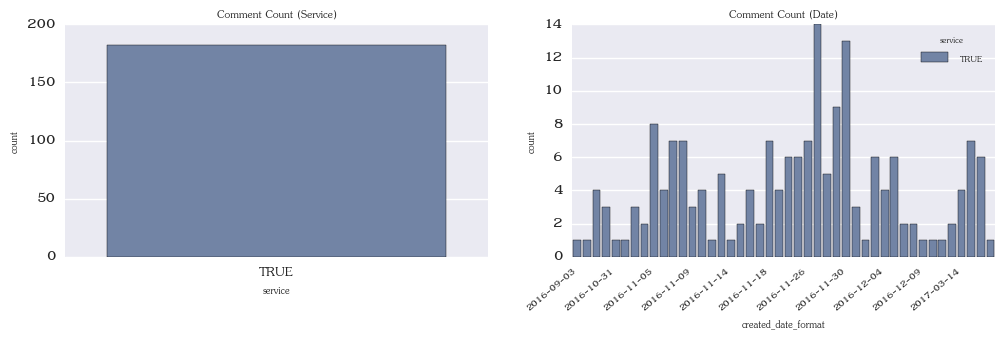

In [100]:
analyzeUserComment('Joe KonTummada')

Surasak Wongmalee has 21 comments.
Sample comment : 
15


,message,created_date_format,service
4899,ช่วยเพิ่ม fub ก่อนดีกว่าใหมครับ ทุกวันนี้ ใช้ ...,2016-07-02,DTAC
22582,ปัญหาที่ร้องเรียนไป ไม่ได้รับการแก้ไข จะไปทำเร...,2016-11-18,DTAC
29808,ลื่นไหล ไถ แถ ไปเรื่อยๆ มีปัญหาแต่ไม่มีปัญญาแก...,2016-12-10,DTAC
33478,เปลี่ยนเป็นรายเดือนคุ้มเหี้ยอะไร ขนาดโปรเนท แม...,2016-12-11,DTAC
33084,ลื่น ไถล ไถ แถ ไปได้ทุกปัญหา แต่ไม่มีปัญญาแก้ไ...,2016-12-12,DTAC
30948,โปรเนท ทำใมต้องหมดตอนเที่ยงคืนด้วย ทำใมไม่ สมั...,2016-12-27,DTAC
36765,โปรเนท ทำใมต้องหมดตอนเที่ยงคืนด้วย ทำใมไม่ สมั...,2016-12-27,DTAC


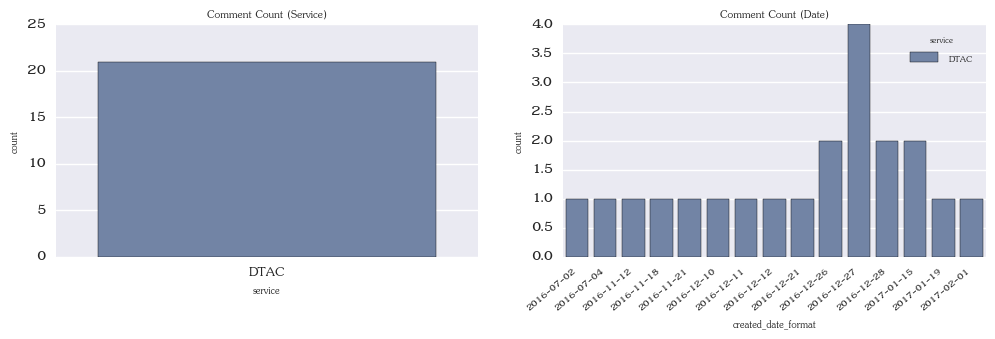

In [163]:
#Randomly select one person to analyze
sampleComment = commentDf['commenter_name'].value_counts().head(750).sample(1)
analyzeUserComment(sampleComment.index[0])

## Here is some interesting case in found using the sampling function
----

Pattaraphong Sawadiruttana has 38 comments.
Sample comment : 
35


,message,created_date_format,service
11253,เจ๋งมากกกกกกก คอนเฟิร์ม!!! ฟรีๆๆๆๆค่าเนต ฟังเพ...,2016-07-26,DTAC
12310,เนตไม่ค่อยดีเลยอ่ะ ขึ้น R ตลอด ทั้งที่ทำงานและ...,2016-08-08,DTAC
20413,แปลกใจทำมัยดีแทคโพสต์ทุกครั้งมีแต่ลูกค้ามาด่า ...,2016-11-08,DTAC
39639,แล้วอั้มจะเสียใจ ที่เลือกใช้ดีแทค 555555,2017-01-13,DTAC
150706,ปังมากโปรนี้ 😘,2017-01-17,TRUE
152186,เฮง เฮง ระบบรายเดือนมีไรพิเศษให้ลูกค้าบ้างครับ...,2017-01-27,TRUE
153745,Beats แพงไปหน่อยเนอะ ระดับเราใช้ JBL เหมาะดีแต...,2017-02-10,TRUE


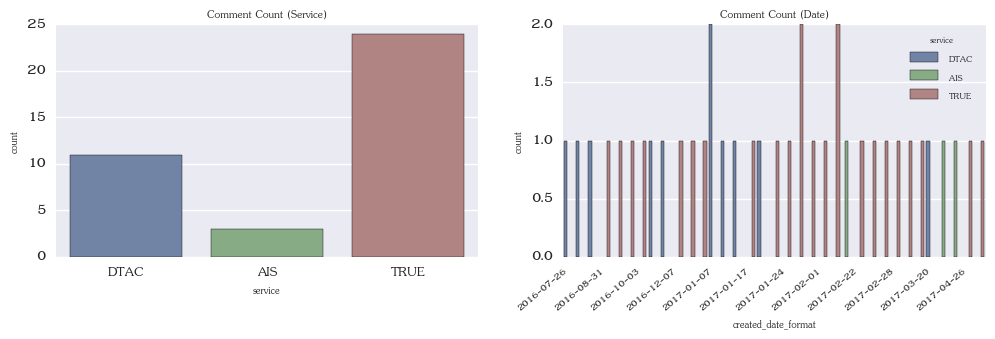

In [134]:
analyzeUserComment('Pattaraphong Sawadiruttana')

In [138]:
commentDf[commentDf['commenter_name']=='Pattaraphong Sawadiruttana'].sort_values('created_date').head(10)

,commenter_name,created_time,like_count,message,service,created_date,created_date_format
11253,Pattaraphong Sawadiruttana,2016-07-26 01:30:38,5.0,เจ๋งมากกกกกกก คอนเฟิร์ม!!! ฟรีๆๆๆๆค่าเนต ฟังเพ...,DTAC,2016-07-26 01:30:38,2016-07-26
11334,Pattaraphong Sawadiruttana,2016-07-27 04:24:07,4.0,กำลังย้ายค่ายเบอร์เดิมไปดีแทครายเดือนแล้วนะ เน...,DTAC,2016-07-27 04:24:07,2016-07-27
12310,Pattaraphong Sawadiruttana,2016-08-08 11:12:33,3.0,เนตไม่ค่อยดีเลยอ่ะ ขึ้น R ตลอด ทั้งที่ทำงานและ...,DTAC,2016-08-08 11:12:33,2016-08-08
134320,Pattaraphong Sawadiruttana,2016-08-31 11:38:14,0.0,เจ้าอื่นๆเค้าเม็กล่ะกี่บาทใครรู้บ้าง,TRUE,2016-08-31 11:38:14,2016-08-31
135847,Pattaraphong Sawadiruttana,2016-09-03 06:01:16,0.0,ลดสีเดียว สีอื่นๆล่ะ,TRUE,2016-09-03 06:01:16,2016-09-03
136845,Pattaraphong Sawadiruttana,2016-09-17 05:56:37,0.0,ชื่นชมครับ คนปกติอย่างเราๆบางคนยังทำไม่ได้อย่า...,TRUE,2016-09-17 05:56:37,2016-09-17
137031,Pattaraphong Sawadiruttana,2016-10-03 06:06:31,0.0,เติมเงิน หรือ รายเดือน เอาดีๆๆๆ คนอ่าน งง กันห...,TRUE,2016-10-03 06:06:31,2016-10-03
20413,Pattaraphong Sawadiruttana,2016-11-08 03:22:22,2.0,แปลกใจทำมัยดีแทคโพสต์ทุกครั้งมีแต่ลูกค้ามาด่า ...,DTAC,2016-11-08 03:22:22,2016-11-08
20570,Pattaraphong Sawadiruttana,2016-11-09 00:38:57,3.0,ตอนแรกจะย้ายค่ายจากทรูไปดีแทค สรุปกูไม่ไปล่ะ อ...,DTAC,2016-11-09 00:38:57,2016-11-09
142971,Pattaraphong Sawadiruttana,2016-12-07 03:41:48,0.0,Lenovo กับ oppo อันไหนดีกว่า,TRUE,2016-12-07 03:41:48,2016-12-07


## You can kind of see user story here.
------------------
He was first using AIS. Then he is considering to switch to Dtac, but later change his mind and go to True.

กุญแจชีวิต เข็มทิศหัวใจ has 10 comments.
Sample comment : 
9


,message,created_date_format,service
7308,แอดทำไมใช้รายเดือนเน็ต399เมื่อวันที่่ 25มิถุนา...,2016-07-05,DTAC
7284,แอดคัฟรบกวนตอบด้วย คือสมัครเน็ตรายเดือน399ไปตั...,2016-07-05,DTAC
9961,คือไม่รุ้กุจะสมัครเนตรายเดือนเพื่อไร399เล่นห่า...,2016-07-15,DTAC
13586,เน็ตดีแทคกากมากขนาดใช้รายเดือนนะ,2016-08-21,DTAC
23751,ไม่เอาแล้วห่วยแตกสิ้นดีสัสซื้อS1มายังไม่ถึงเดื...,2016-11-21,DTAC
36445,ไม่ต้องรอถึงปีหรอกสัสเพิ่งซื้อมาไม่ถึงเดือนทั้...,2016-12-29,DTAC
97222,A,2017-01-31,AIS


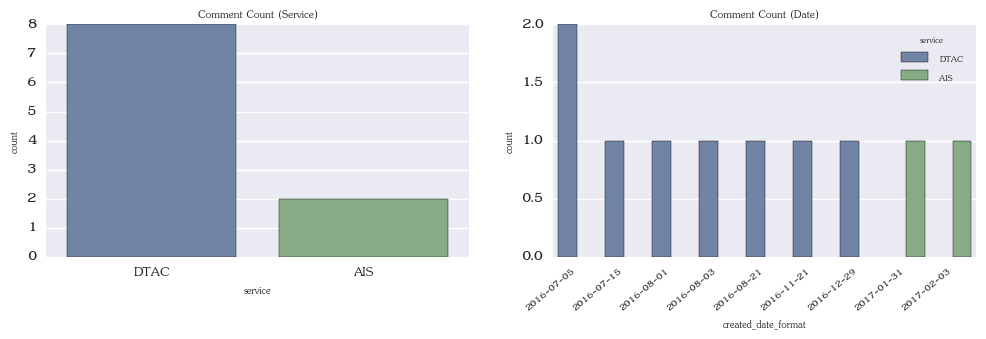

In [140]:
analyzeUserComment('กุญแจชีวิต เข็มทิศหัวใจ')

## I don't think he is that happy with dtac facbook admin.
------------

In [142]:
commentDf[commentDf['commenter_name']=='กุญแจชีวิต เข็มทิศหัวใจ'].sort_values('created_date')

,commenter_name,created_time,like_count,message,service,created_date,created_date_format
7308,กุญแจชีวิต เข็มทิศหัวใจ,2016-07-05 05:02:28,0.0,แอดทำไมใช้รายเดือนเน็ต399เมื่อวันที่่ 25มิถุนา...,DTAC,2016-07-05 05:02:28,2016-07-05
7284,กุญแจชีวิต เข็มทิศหัวใจ,2016-07-05 08:16:14,0.0,แอดคัฟรบกวนตอบด้วย คือสมัครเน็ตรายเดือน399ไปตั...,DTAC,2016-07-05 08:16:14,2016-07-05
9961,กุญแจชีวิต เข็มทิศหัวใจ,2016-07-15 05:24:24,6.0,คือไม่รุ้กุจะสมัครเนตรายเดือนเพื่อไร399เล่นห่า...,DTAC,2016-07-15 05:24:24,2016-07-15
11784,กุญแจชีวิต เข็มทิศหัวใจ,2016-08-01 17:12:49,0.0,เหี้ยเถอะกูส่งแชทไปถาม2วันแหละไม่ตอบเอาไงวะกูต...,DTAC,2016-08-01 17:12:49,2016-08-01
11907,กุญแจชีวิต เข็มทิศหัวใจ,2016-08-03 13:00:25,0.0,ไอ้แอดเอาไงวะส่งแชทไปถามก็ไม่ตอบหลายวันแล้วนะต...,DTAC,2016-08-03 13:00:25,2016-08-03
13586,กุญแจชีวิต เข็มทิศหัวใจ,2016-08-21 15:35:30,1.0,เน็ตดีแทคกากมากขนาดใช้รายเดือนนะ,DTAC,2016-08-21 15:35:30,2016-08-21
23751,กุญแจชีวิต เข็มทิศหัวใจ,2016-11-21 15:55:59,0.0,ไม่เอาแล้วห่วยแตกสิ้นดีสัสซื้อS1มายังไม่ถึงเดื...,DTAC,2016-11-21 15:55:59,2016-11-21
36445,กุญแจชีวิต เข็มทิศหัวใจ,2016-12-29 10:06:01,1.0,ไม่ต้องรอถึงปีหรอกสัสเพิ่งซื้อมาไม่ถึงเดือนทั้...,DTAC,2016-12-29 10:06:01,2016-12-29
97222,กุญแจชีวิต เข็มทิศหัวใจ,2017-01-31 10:02:31,0.0,A,AIS,2017-01-31 10:02:31,2017-01-31
97193,กุญแจชีวิต เข็มทิศหัวใจ,2017-02-03 09:09:18,0.0,A,AIS,2017-02-03 09:09:18,2017-02-03


## Here he is complaining about bad signal. If we have social media listener, we might prevent these group of customer from leaving.
------------

In [165]:
commentDf[commentDf['commenter_name']=='Tanawat Setthakorn'].sort_values('created_date')

,commenter_name,created_time,like_count,message,service,created_date,created_date_format
58320,Tanawat Setthakorn,2017-04-22 18:26:53,0.0,ทำไมมันเนตช้ามากเลยอะครับ ตอนนี้ผมใช้โปร 1299 ...,DTAC,2017-04-22 18:26:53,2017-04-22
58325,Tanawat Setthakorn,2017-04-23 02:35:36,0.0,ช่วยมาตอบผมหน่อยครับ,DTAC,2017-04-23 02:35:36,2017-04-23
58506,Tanawat Setthakorn,2017-04-23 02:36:02,0.0,ผมจ่ายไม่ใช่ถูกๆนะครับ 1299!!!,DTAC,2017-04-23 02:36:02,2017-04-23
58370,Tanawat Setthakorn,2017-04-23 02:36:34,0.0,ไม่งั้นย้ายค่ายแน่!!,DTAC,2017-04-23 02:36:34,2017-04-23
58671,Tanawat Setthakorn,2017-04-23 04:32:51,4.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:32:51,2017-04-23
58426,Tanawat Setthakorn,2017-04-23 04:33:12,1.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:33:12,2017-04-23
58499,Tanawat Setthakorn,2017-04-23 04:33:26,0.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:33:26,2017-04-23
58402,Tanawat Setthakorn,2017-04-23 04:33:43,0.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:33:43,2017-04-23
58087,Tanawat Setthakorn,2017-04-23 04:34:07,1.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:34:07,2017-04-23
58037,Tanawat Setthakorn,2017-04-23 04:34:32,0.0,ทำไมอะ ผมอุตส่าห์ย้ายค่ายมาหาคุณ แต่คุณทำกับผม...,DTAC,2017-04-23 04:34:32,2017-04-23


In [166]:
commentDf[commentDf['commenter_name']=='ผ่านมา แค่ให้จำ'].sort_values('created_date')

,commenter_name,created_time,like_count,message,service,created_date,created_date_format
67373,ผ่านมา แค่ให้จำ,2016-07-15 04:37:26,1.0,ลูกค้าเก่า คุณไม่ดูแล ใช้มาเกือบ10ปี โปรแพง พอ...,AIS,2016-07-15 04:37:26,2016-07-15
69755,ผ่านมา แค่ให้จำ,2016-07-21 13:36:40,0.0,ไหนบอกเต็มสปีด 3G จะหมดก่อน 30 วันอยู่เหรอค่ะ,AIS,2016-07-21 13:36:40,2016-07-21
9950,ผ่านมา แค่ให้จำ,2016-07-29 09:55:19,0.0,มันยกเลิกสัญญาทาสไม่ได้ติคับ จรดปักกาเซ็นสัญญา...,DTAC,2016-07-29 09:55:19,2016-07-29
12780,ผ่านมา แค่ให้จำ,2016-08-12 10:00:17,0.0,อยากได้สักเครื่องทำงัย คับเห็นบอกของหมด ไหนๆจะ...,DTAC,2016-08-12 10:00:17,2016-08-12
12779,ผ่านมา แค่ให้จำ,2016-08-12 10:05:08,0.0,สำหรับท่านๆ ที่ได้มาแล้ว รีวิวให้ดูหน่อยคับถ้า...,DTAC,2016-08-12 10:05:08,2016-08-12
32393,ผ่านมา แค่ให้จำ,2016-12-11 06:20:11,0.0,ห่วยมากๆๆๆๆๆๆๆๆๆ,DTAC,2016-12-11 06:20:11,2016-12-11
146850,ผ่านมา แค่ให้จำ,2016-12-28 10:41:41,0.0,รายงานปันหาไปก้อเหมือนเดิม..ไม่มีอะรัยดีขึ้น.....,TRUE,2016-12-28 10:41:41,2016-12-28
48897,ผ่านมา แค่ให้จำ,2017-02-18 06:24:13,0.0,4g ในเมืองมีสัญญาณแค่เนี้ยดูเอา,DTAC,2017-02-18 06:24:13,2017-02-18
100382,ผ่านมา แค่ให้จำ,2017-02-23 15:47:22,1.0,แดกไป เกือบพันเลยเดือนนี้จะเลิกชั้ยจิงๆแระย้าย...,AIS,2017-02-23 15:47:22,2017-02-23
104047,ผ่านมา แค่ให้จำ,2017-03-11 13:46:37,0.0,ใช้เน็ตรายเดือนเล่นได้เดือนเดียวไม่ค้างค่างวดส...,AIS,2017-03-11 13:46:37,2017-03-11


## And much more. 
-------------------
We can know users story from these comments. Imagine combine with machine learning model that can detect whether the comment is unhappy or not. We can prevent a large portion of user from leaving.